In [153]:
import pandas as pd
import numpy as np
# !pip3 install color-it
from colorit import *
# reading the pollution dataset
df=pd.read_csv('sau.csv')
print(color("Pollution dataset, first five lines", Colors.red))
print(df.head())
#reading the covid values
df_cov = pd.read_excel('cov.xlsx')
df_new_cov=df_cov.filter(['Date', 'Cummulative Number of Cases in Delhi'])
print(color("Covid dataset, first five lines", Colors.red))
print(df_new_cov.head())

Pollution dataset, first five lines
       date  pm25  pm10  o3  no2  so2  co
0  02-12-19         251  26   25    3  14
1  03-12-19   240   319  40   28    9  20
2  04-12-19   311   417  47   22    8  18
3  05-12-19   398   304  22   26    9  15
4  06-12-19   333   326  26   26    7  16
Covid dataset, first five lines
        Date Cummulative Number of Cases in Delhi
0 2020-03-02                              1(n.a.)
1 2020-03-04                             2(+100%)
2 2020-03-05                              3(+50%)
3 2020-03-06                              4(+33%)
4 2020-03-09                              5(+25%)


In [154]:
def sep(x):
    a = x.split('(')[0]
#     print(a)
    x=int(a.replace(',',''))
    return x

df_new_cov['Cumulative_cases'] = df_new_cov['Cummulative Number of Cases in Delhi'].apply(sep)
df_new_cov.head()

,Date,Cummulative Number of Cases in Delhi,Cumulative_cases
0,2020-03-02,1(n.a.),1
1,2020-03-04,2(+100%),2
2,2020-03-05,3(+50%),3
3,2020-03-06,4(+33%),4
4,2020-03-09,5(+25%),5


In [155]:
s1= df.set_index('date').combine_first(df_new_cov.set_index('Date')).reset_index()
s1['Cumulative_cases']=s1['Cumulative_cases'].fillna(method='ffill')
s1.head()

,index,co,no2,o3,pm10,pm25,so2,Cummulative Number of Cases in Delhi,Cumulative_cases
0,2019-02-12,14,25,26,251,,3,NaN,NaN
1,2019-03-12,20,28,40,319,240,9,NaN,NaN
2,2019-04-12,18,22,47,417,311,8,NaN,NaN
3,2019-05-12,15,26,22,304,398,9,NaN,NaN
4,2019-06-12,16,26,26,326,333,7,NaN,NaN


In [156]:
start_date = '2020-03-27'
end_date = '2020-08-24'
s2 = s1[(s1['index']>= start_date) & (s1['index']<= end_date)]


In [157]:
s3=s2.filter(['index',' co',' no2',' o3',' pm10',' pm25',' so2','Cumulative_cases'])
s3= s3.replace(r'^\s+$', 0, regex=True)
s3['daily_cases'] = s3['Cumulative_cases'] - s3['Cumulative_cases'].shift(1)
s3.fillna(1).head()

,index,co,no2,o3,pm10,pm25,so2,Cumulative_cases,daily_cases
108,2020-03-27,11,3,13,41,81,6,39.0,1.0
109,2020-03-28,13,3,13,58,86,7,39.0,0.0
110,2020-03-29,12,4,21,64,101,8,49.0,10.0
111,2020-03-30,10,4,23,70,105,7,97.0,48.0
112,2020-03-31,7,4,28,70,110,10,97.0,0.0


(array([737516., 737546., 737577., 737607., 737638.]),
 <a list of 5 Text xticklabel objects>)

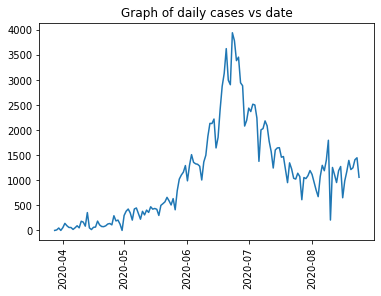

In [158]:
# !pip install dtaidistance
import matplotlib.pyplot as plt
plt.title("Graph of daily cases vs date")
plt.plot(s3['index'], s3['daily_cases'])
plt.xticks(rotation='vertical')

mean of pm25 values: 10.022900763358779


(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f5f5f1fd080>])

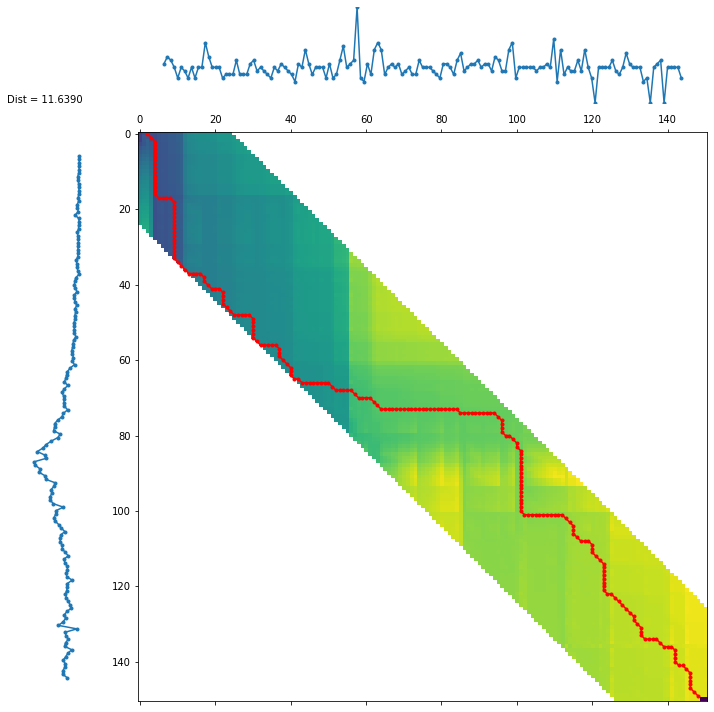

In [159]:
from dtaidistance import dtw_visualisation as dtwvis
cal=s3['daily_cases'].fillna(1)
pm=s3[' co']
n1=cal.to_numpy()
n2=pm.to_numpy()
n1 = n1.astype('float64') 
n2 = n2.astype('float64') 
col_mean = np.nanmean(n2, axis=0)
inds = np.where(np.isnan(n2))
n2[inds]= col_mean
print("mean of pm25 values:", col_mean)
# print(n1)
# print(n2)
from scipy import stats
nz1 = stats.zscore(n1)
nz2 = stats.zscore(n2)
d, paths = dtw.warping_paths(nz1, nz2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(nz1, nz2, paths, best_path)